In [426]:
import numpy as np
import sklearn  as sk
from sklearn import datasets
import matplotlib.pyplot as plt
%matplotlib inline

## Задание 1
Сгенерировать датасет при помощи sklearn.datasets.make_regression и обучить линейную модель при помощи градиентного и стохастического градиентного спуска. Нанести среднеквадратичную ошибку для обоих методов на один график, сделать выводы о разнице скорости сходимости каждого из методов.

In [427]:
data, target, coef = datasets.make_regression(n_samples=5000, n_features = 1, n_informative = 1, 
                                                 n_targets = 1, noise = 10, coef = True, random_state = 4)
scaler = StandardScaler()
data = scaler.fit_transform(data)
data

array([[ 0.36328494],
       [ 0.10302612],
       [ 1.21064453],
       ...,
       [ 0.26986033],
       [-1.30048405],
       [ 0.41162897]])

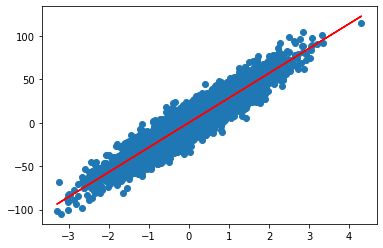

In [428]:
plt.scatter(data,target)
plt.plot(data,coef*data,color = 'red')
plt.show()

In [429]:
# Добавим свободный столбец из единиц
a=np.ones(len(data))
data = np.hstack((np.column_stack(a).reshape(-1,1),data))
data, data.shape

(array([[ 1.        ,  0.36328494],
        [ 1.        ,  0.10302612],
        [ 1.        ,  1.21064453],
        ...,
        [ 1.        ,  0.26986033],
        [ 1.        , -1.30048405],
        [ 1.        ,  0.41162897]]),
 (5000, 2))

In [430]:
def mse(y_pred,y):
    return ((y_pred - y)**2).mean()

In [431]:
def print_result(y_pred,y,W_classic,iter_classic):
    print('Результаты обучения  градиентного спуска')
    print(f'полученный результат W \n {W_classic}')
    print(f'последняя ошибка -  {round(iter_classic[-1],4)},минимальная ошибка {round (min(iter_classic),4)}')
    print(f'Количество итераций  - {len(iter_classic)}')

In [424]:
# Функция градиентнго спуска
def gradient_descent(X,Y,alpha=0.01,count_iter_max = int(1e4),error_min =1e-3 ):
    number_obj,number_features = X.shape
    W1 = np.random.randn(number_features).reshape(-1,1)
    data=[]
    for  i in range(count_iter_max):
        Y_pred = X@W1
        data.append(mse(Y_pred,Y))
        delta = Y_pred-Y
        W1_old = W1.copy()
        W1-=alpha*2/number_obj*(X.T@delta)
        if (((W1-W1_old).T@(W1-W1_old)))**(1/2)<error_min:
            print_result(Y_pred,Y,W1,data)
            return W1,data  
    print_result(Y_pred,Y,W1,data)    
    return W1,data

In [435]:
# Расчет по нашим данным градиентного спуска
W, iter_classic = gradient_descent(data,target.reshape(-1,1) )

Результаты обучения  градиентного спуска
полученный результат W 
 [[-9.89225801e-03]
 [ 2.79148676e+01]]
последняя ошибка -  99.6292,минимальная ошибка 99.6292
Количество итераций  - 315


In [436]:
# Функция стохастического гр. спуска
def s_gradient_descent(X,Y,alpha=0.01,count_iter_max = 10000,error_min =1e-3):
    number_obj,number_features = X.shape
    W2 = np.zeros((number_features,1))
    data=[]
    for  i in range(count_iter_max):
        item = np.random.randint(number_obj)
        Y_pred = X[item]@W2
        data.append(mse(X@W2,Y))
        delta = Y_pred-Y[item]
        W2_old = W2.copy()
        W2-=alpha*2*delta*X[item].reshape(-1,1)
        if np.linalg.norm(W2-W2_old,ord = 2)<error_min:
            print_result(X@W2,Y,W2,data)
            return W2,data
    print_result(X@W2,Y,W2,data)    
    return W2,data

In [437]:
W, iter_s = s_gradient_descent(data,target.reshape(-1,1) )

Результаты обучения  градиентного спуска
полученный результат W 
 [[ 0.11652728]
 [28.16755069]]
последняя ошибка -  99.6848,минимальная ошибка 99.6271
Количество итераций  - 888


Нарисуем графики ошибок при обучении error_min =1e-3

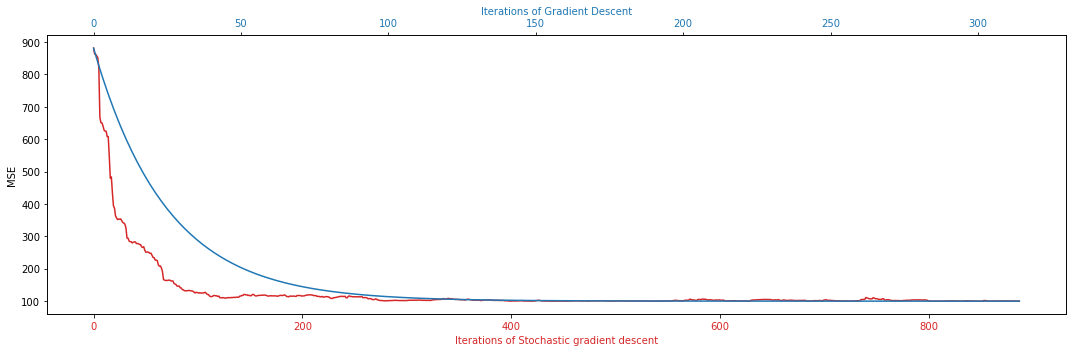

In [438]:
fig, ax2 = plt.subplots(figsize=(15, 5))
color = 'tab:red'
ax2.set_xlabel('Iterations of Stochastic gradient descent', color=color)
ax2.set_ylabel('MSE')
ax2.plot(iter_s, color=color)
ax2.tick_params(axis='x', labelcolor=color)
ax1 = ax2.twiny()
color = 'tab:blue'
ax1.set_xlabel('Iterations of Gradient Descent', color=color)
ax1.plot(iter_classic, color=color)
ax1.tick_params(axis='x', labelcolor=color)

fig.tight_layout()
plt.show()

Чтобы достич установленный уровень сходимости, стахостический метод требует больше опереаций и времени. 
Попробую нормализовать признаки и проделать то же самое.

In [439]:
def norm(a):
    return (a-a.min())/(a.max()-a.min())

In [440]:
data1= data.copy()

In [441]:
for i in range(1, data1.shape[1]):
    data1[:,i] = norm(data1[:,i])

In [442]:
data1.max(axis=0),data1.min(axis = 0)

(array([1., 1.]), array([1., 0.]))

In [450]:
W, iter_classic = gradient_descent(data1,target.reshape(-1,1),alpha=0.01,count_iter_max = int(1e5),error_min =1e-4 )

Результаты обучения  градиентного спуска
полученный результат W 
 [[-91.91152485]
 [212.03674969]]
последняя ошибка -  99.6285,минимальная ошибка 99.6285
Количество итераций  - 22340


In [453]:
W, iter_s = s_gradient_descent(data1,target.reshape(-1,1) ,alpha=0.01,count_iter_max = 100000,error_min =1e-4)

Результаты обучения  градиентного спуска
полученный результат W 
 [[-90.54034949]
 [208.44913831]]
последняя ошибка -  99.9238,минимальная ошибка 99.8318
Количество итераций  - 16009


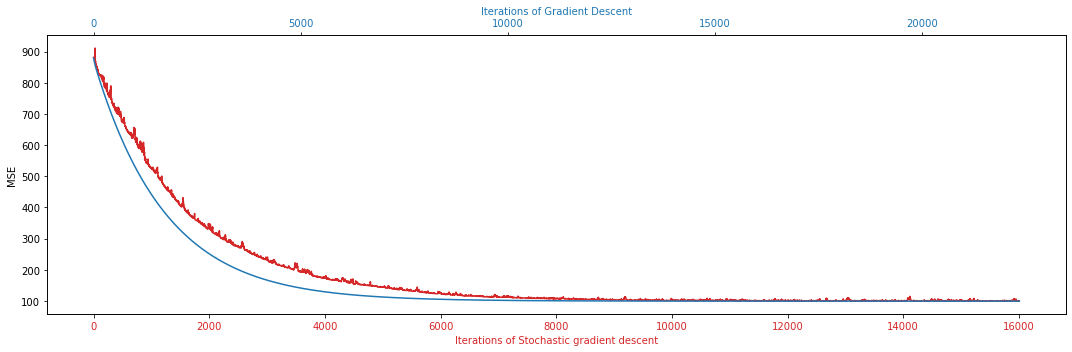

In [454]:
fig, ax2 = plt.subplots(figsize=(15, 5))
color = 'tab:red'
ax2.set_xlabel('Iterations of Stochastic gradient descent', color=color)
ax2.set_ylabel('MSE')
ax2.plot(iter_s, color=color)
ax2.tick_params(axis='x', labelcolor=color)
ax1 = ax2.twiny()
color = 'tab:blue'
ax1.set_xlabel('Iterations of Gradient Descent', color=color)
ax1.plot(iter_classic, color=color)
ax1.tick_params(axis='x', labelcolor=color)

fig.tight_layout()
plt.show()

Обратная ситуация, чтобы достич установленный уровень сходимости стахостический метод требует меньше опереаций и времени. 

Попробую стандартизацию

In [455]:
def stand(a):
    return (a-a.mean())/a.std()

In [456]:
data2= data.copy()

In [457]:
for i in range(1, data2.shape[1]):
    data2[:,i] = stand(data2[:,i])

In [461]:
W, iter_classic = gradient_descent(data2,target.reshape(-1,1) )

Результаты обучения  градиентного спуска
полученный результат W 
 [[-1.38377879e-02]
 [ 2.79142809e+01]]
последняя ошибка -  99.6292,минимальная ошибка 99.6292
Количество итераций  - 310


In [462]:
W, iter_s = s_gradient_descent(data2,target.reshape(-1,1) )

Результаты обучения  градиентного спуска
полученный результат W 
 [[-0.40521911]
 [28.58900536]]
последняя ошибка -  100.1738,минимальная ошибка 99.6843
Количество итераций  - 258


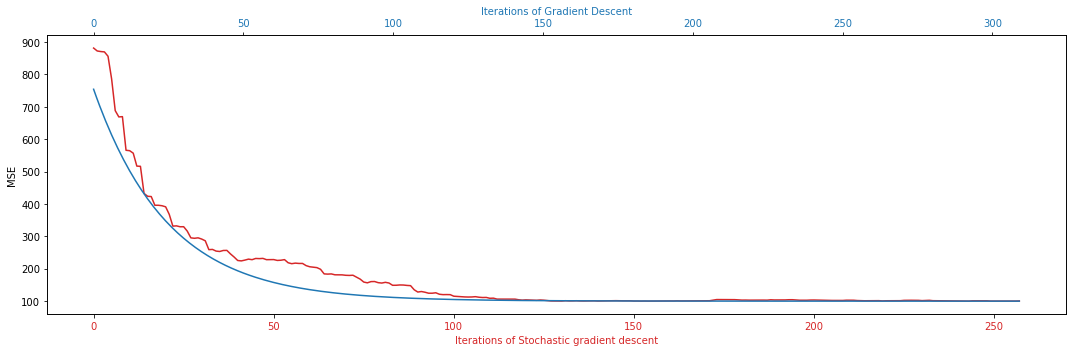

In [463]:
fig, ax2 = plt.subplots(figsize=(15, 5))
color = 'tab:red'
ax2.set_xlabel('Iterations of Stochastic gradient descent', color=color)
ax2.set_ylabel('MSE')
ax2.plot(iter_s, color=color)
ax2.tick_params(axis='x', labelcolor=color)
ax1 = ax2.twiny()
color = 'tab:blue'
ax1.set_xlabel('Iterations of Gradient Descent', color=color)
ax1.plot(iter_classic, color=color)
ax1.tick_params(axis='x', labelcolor=color)

fig.tight_layout()
plt.show()

Чтобы достич установленный уровень сходимости стахостический метод требует меньше опереаций и времени. 

## Задание № 2

Модифицировать решение первого задания путем добавления 𝐿2 -регуляризации и сравнить результаты

In [465]:
def mse_l2(y_pred,y,W,k=0.001):
    return ((y_pred - y)**2).mean()+k*(W*W).sum()

In [466]:
# Функция градиентнго спуска  c 𝐿2 -регуляризации
def gradient_descent_l2(X,Y,alpha=0.01,count_iter_max = int(1e5),error_min =1e-3,k=0.001):
    number_obj,number_features = X.shape
    Wl2 = np.random.randn(number_features).reshape(-1,1)
    data=[]
    for  i in range(count_iter_max):
        Y_pred = X@Wl2
        data.append(mse_l2(Y_pred,Y,Wl2,k=k))
        delta = Y_pred-Y
        Wl2_old = Wl2.copy()
        Wl2-=alpha*2/number_obj*(X.T@delta)+2*k*Wl2
        if (((Wl2-Wl2_old).T@(Wl2-Wl2_old)))**(1/2)<error_min:
            print_result(Y_pred,Y,Wl2,data)
            return Wl2,data  
    print_result(Y_pred,Y,Wl2,data)    
    return Wl2,data

In [467]:
W, iter_classic = gradient_descent(data,target.reshape(-1,1) )

Результаты обучения  градиентного спуска
полученный результат W 
 [[-1.18397823e-02]
 [ 2.79141862e+01]]
последняя ошибка -  99.6293,минимальная ошибка 99.6293
Количество итераций  - 313


In [468]:
W, iter_classic_l2 = gradient_descent_l2(data,target.reshape(-1,1),k=0.001 )

Результаты обучения  градиентного спуска
полученный результат W 
 [[-8.60166862e-03]
 [ 2.53764930e+01]]
последняя ошибка -  106.9658,минимальная ошибка 106.9658
Количество итераций  - 287


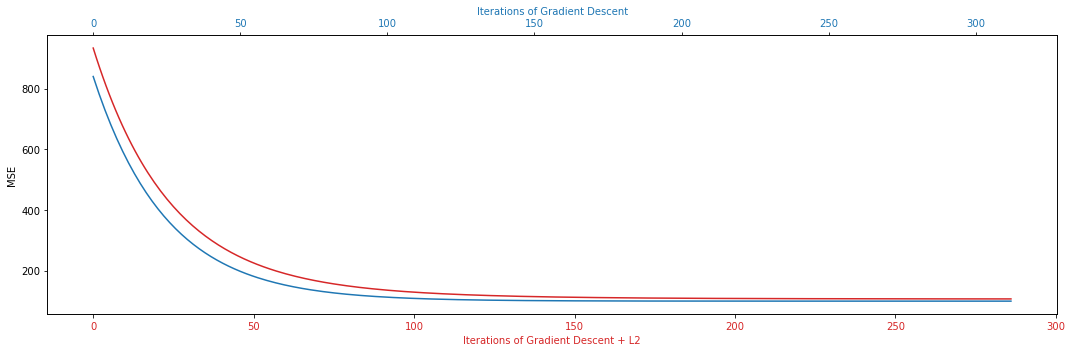

In [469]:
fig, ax2 = plt.subplots(figsize=(15, 5))
color = 'tab:red'
ax2.set_xlabel('Iterations of Gradient Descent + L2', color=color)
ax2.set_ylabel('MSE')
ax2.plot(iter_classic_l2, color=color)
ax2.tick_params(axis='x', labelcolor=color)
ax1 = ax2.twiny()
color = 'tab:blue'
ax1.set_xlabel('Iterations of Gradient Descent', color=color)
ax1.plot(iter_classic, color=color)
ax1.tick_params(axis='x', labelcolor=color)

fig.tight_layout()
plt.show()

Для того, чтобы достичь установленный уровень сходимости  путем добавления 𝐿2 регуляризации требуется чуть меньше опереаций и времени. 

## Задание 3
Модернизировать решение задания 2, заменив L2 регуляризацию на L1 регуляризацию.

In [470]:
def mse_l1(y_pred,y,W,k=0.001):
    return ((y_pred - y)**2).mean()+k*np.abs(W).sum()

In [472]:
# Функция градиентнго спуска  c 𝐿1 -регуляризации
def gradient_descent_l1(X,Y,alpha=0.01,count_iter_max = int(1e4),error_min =1e-3,k=0.001):
    number_obj,number_features = X.shape
    Wl1 = np.random.randn(number_features).reshape(-1,1)
    data=[]
    for  i in range(count_iter_max):
        Y_pred = X@Wl1
        data.append(mse_l1(Y_pred,Y,Wl1,k=k))
        delta = Y_pred-Y
        Wl1_old = Wl1.copy()
        W_delta = np.array([])
        for j in Wl1:
            if j>0:
                W_delta = np.append(W_delta, k)
            elif j<0:
                W_delta=np.append(W_delta, -k)
            else:
                W_delta = np.append(W_delta, 0)    
        W_delta = W_delta.reshape(-1,1) 
        Wl1-=alpha*2/number_obj*(X.T@delta)+2*W_delta
        if (((Wl1-Wl1_old).T@(Wl1-Wl1_old)))**(1/2)<error_min:
            print_result(Y_pred,Y,Wl1,data)
            return Wl1,data  
    print_result(Y_pred,Y,Wl1,data)    
    return Wl1,data

In [473]:
W, iter_classic_l1 = gradient_descent_l1(data,target.reshape(-1,1),k=0.001 )

Результаты обучения  градиентного спуска
полученный результат W 
 [[5.74135989e-05]
 [2.78629928e+01]]
последняя ошибка -  99.6647,минимальная ошибка 99.6647
Количество итераций  - 10000


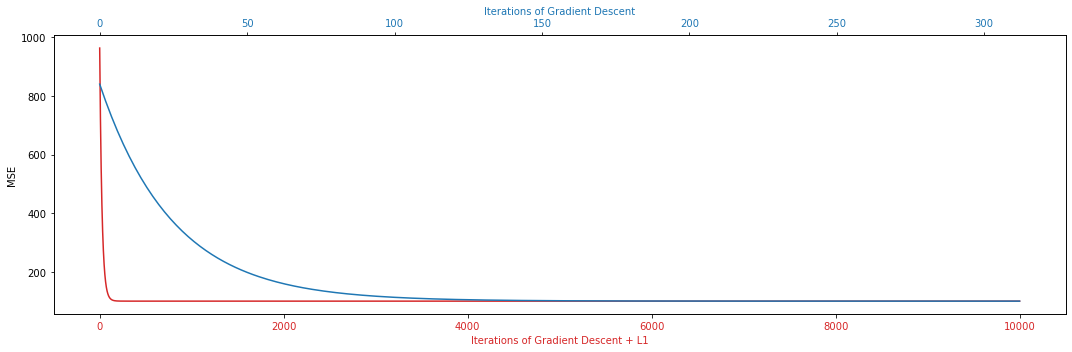

In [474]:
fig, ax2 = plt.subplots(figsize=(15, 5))
color = 'tab:red'
ax2.set_xlabel('Iterations of Gradient Descent + L1', color=color)
ax2.set_ylabel('MSE')
ax2.plot(iter_classic_l1, color=color)
ax2.tick_params(axis='x', labelcolor=color)
ax1 = ax2.twiny()
color = 'tab:blue'
ax1.set_xlabel('Iterations of Gradient Descent', color=color)
ax1.plot(iter_classic, color=color)
ax1.tick_params(axis='x', labelcolor=color)

fig.tight_layout()
plt.show()

Обратная ситуация, чтобы достич установленный уровень сходимости  путем добавления 𝐿1 регуляризации требуется значительно боьше опереаций и времени.